## Week 5 & 6 
q1: (a) Derive an acceptance-rejection algorithm to generate samples of the random variable with the probability density function: f(x) = sin(x)/2, 0<= x <= pi. The variable here is measured in radians not degrees. 
(b) Generate 1000 samples of the random variable and plot a histogram of your samples 
(c) What is the expected number of times that your acceptance-rejection method loops around in order to return a single random variable? 
(d) What is the probability that your acceptance-rejection algorithm will take at least 8 loops around in order to return a single random variable?  

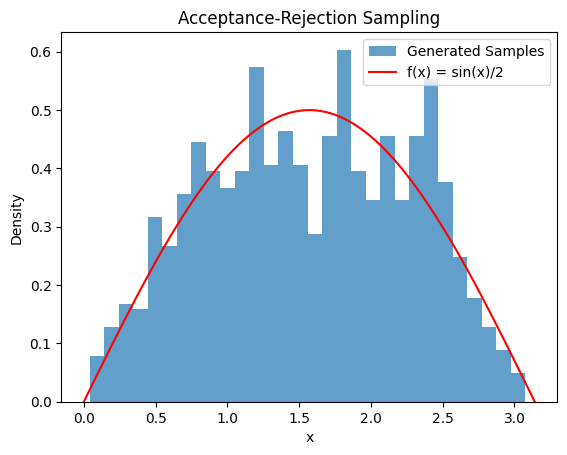

Expected number of loops per sample: 1.394
Probability of at least 8 loops: 0.00014409009790366715


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, uniform

def f(x):
    """Target probability density function."""
    return np.sin(x) / 2

def acceptance_rejection(num_samples, proposal_dist, c=None):
    """Generates samples from f(x) using acceptance-rejection.

    Args:
        num_samples (int): Number of samples to generate.
        proposal_dist (scipy.stats distribution): Proposal distribution.
        c (float, optional): Constant such that f(x) <= c*g(x) for all x. 
                              If None, a suitable value is estimated.

    Returns:
        tuple: A tuple containing the list of samples and the total number of attempts.
    """
    samples = []
    attempts = 0

    if c is None:
        # Estimate a suitable 'c' (upper bound)
        x_grid = np.linspace(proposal_dist.a, proposal_dist.b, 1000)  # Evaluate over the support of g(x)
        c = np.max(f(x_grid) / proposal_dist.pdf(x_grid))

    while len(samples) < num_samples:
        u1 = np.random.rand() 
        u2 = np.random.rand()
        x = proposal_dist.ppf(u1)  

        if u2 <= f(x) / (c * proposal_dist.pdf(x)):  
            samples.append(x)
        attempts += 1

    return samples, attempts

# --- Parameters ---
num_samples = 1000 
proposal_dist = uniform(loc=0, scale=np.pi)  

# (a) Generate samples and calculate attempts (c is automatically determined)
samples, total_attempts = acceptance_rejection(num_samples, proposal_dist)

# (b) Plot histogram 
plt.hist(samples, bins=30, density=True, alpha=0.7, label='Generated Samples')
x = np.linspace(0, np.pi, 100)
plt.plot(x, f(x), 'r-', label='f(x) = sin(x)/2') 
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance-Rejection Sampling')
plt.legend()
plt.show()

# (c) Expected number of loops
acceptance_probability = 1 / (total_attempts/num_samples) 
expected_loops = 1 / acceptance_probability 
print("Expected number of loops per sample:", expected_loops)

# (d) Probability of at least 8 loops (Geometric Distribution)
p = acceptance_probability
prob_at_least_8_loops = geom.sf(7, p)  # Use the survival function (1 - CDF)
print("Probability of at least 8 loops:", prob_at_least_8_loops)

q3: A small river ferry transfers cars to and from the east and west banks of a north-south flowing river. The ferry can carry at most 3 cars, and starts eachday on the west bank. Upon arrival at a bank, the ferry unloads each car it is carrying, loads up to 3 cars from the line of waiting cars and then heads to the opposite bank, without waiting for a full load. If there are no cards to load at either bank when the ferry arrives at a bank, it unloads the cars it has carried and then waits for the first car to arrive at either bank, and then proceeds to that bank ( or stays where it is if the first car arrives at the same bank as the ferry) and continues its operations. 

We make the simplifying assuptions that cars that arrive while the ferry is loading cannot also be loaded before the ferry departs, even if there is room to accomodate them. 

When the ferry arrives at a bank it takes 2 minutes to dock the boat, lower the ramp and unload. The ferry also takes 2 minutes to load, raise the ramp, and cast off. These times are independent of the number of cars on board the ferry. Crossing the river (in either direction) takes 5 minutes. 

If there are no cars waiting at either bank, then the ferry waits at the bank at which it most recently stopped for the first car to arrive. If the first car to arrive shows up at its current bank then it loads the car and continues operations. If the first car to arrive shows up at the opposite bank then it raises the ramp and proceeds to the opposite bank to pick up that car. 

We wish to compute the fraction of time the ferry is transporting at least one car (not counting loading and cast-off or docking time) and the average total time for cars from the two banks (i.e. one average for the west bank and one average for the east bank), from when a car arrives at a bank to when the car has been unloaded from the other bank. 

(a) Precisely describe the state of the system and the events that change the state of the system. 
(b) Write a discrete event simulation for the problem above. Be sure to use comments to highlight how different events change the state of the system and what future events should be scheduled at the occurence of each event. 
(c) Simulate the system with interarrival times on each bank as a uniform random variable between 0 and 30 minutes on each bank, but keep the code clean enough where we could use other random variables for arrival. Make sure to report the statistics of interest. 
(d) Write a simpy simulation assuming cars arrive on the west bank with exponential interarrival times with mean 9 minutes and the same is true on the each bank. Make sure it reports the statistics of interest. 
(e) Run the simulation for 50 replications with each replication going from 6am to 11pm. from each one of these replications, report the statistics of interest. Use all 50 replications to report a confidence interval for each of the statistics of interest. Make the code modular enouogh to change both the replication number and confidence interval. Plot the results of the statistics with confidence intervals. 

Time: 0.04 - Car W91 arrived at 0
Time: 0.04 - Ferry loading 1 cars
Time: 0.06 - Car W43 arrived at 0
Time: 0.08 - Car W96 arrived at 0
Time: 0.08 - Car E100 arrived at 1
Time: 0.10 - Car E15 arrived at 1
Time: 0.14 - Car W10 arrived at 0
Time: 0.15 - Car E3 arrived at 1
Time: 0.18 - Car W8 arrived at 0
Time: 0.25 - Car W53 arrived at 0
Time: 0.28 - Car E26 arrived at 1
Time: 0.41 - Car E61 arrived at 1
Time: 0.45 - Car E10 arrived at 1
Time: 0.46 - Car W49 arrived at 0
Time: 0.49 - Car W77 arrived at 0
Time: 0.51 - Car W20 arrived at 0
Time: 0.54 - Car W33 arrived at 0
Time: 0.56 - Car E54 arrived at 1
Time: 0.59 - Car E46 arrived at 1
Time: 0.68 - Car E83 arrived at 1
Time: 0.69 - Car W4 arrived at 0
Time: 0.73 - Car W85 arrived at 0
Time: 0.77 - Car E38 arrived at 1
Time: 0.78 - Car E35 arrived at 1
Time: 0.79 - Car E2 arrived at 1
Time: 0.80 - Car W59 arrived at 0
Time: 0.81 - Car E36 arrived at 1
Time: 0.84 - Car W36 arrived at 0
Time: 0.86 - Car W5 arrived at 0
Time: 0.93 - Car E

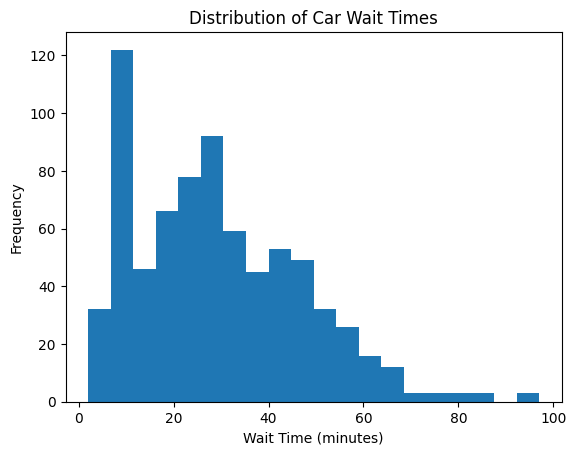

In [10]:
import random
import simpy
import pandas as pd
import matplotlib.pyplot as plt

# Simulation Parameters
SIM_DURATION = 17 * 60  # 6 am to 11 pm
NUM_REPLICATIONS = 50
WEST_BANK = 0
EAST_BANK = 1
FERRY_CAPACITY = 3
LOADING_TIME = 2
TRAVEL_TIME = 5
DOCKING_TIME = 2

class Ferry:
    def __init__(self, env):
        self.env = env
        self.location = WEST_BANK
        self.passengers = 0
        self.busy = False  
        self.passengers_waiting = [ [], [] ] 
        self.event_car_arrived = env.event()

    def ferry_process(self):
        while True:
            yield self.event_car_arrived 

            if self.passengers_waiting[self.location] or self.passengers > 0: 
                yield self.env.process(self.load(min(FERRY_CAPACITY - self.passengers, len(self.passengers_waiting[self.location]))))
                yield self.env.process(self.move(self.location, 1 - self.location))
                yield self.env.process(self.unload())
            else:
                if self.passengers_waiting[1 - self.location]:
                    yield self.env.process(self.move(self.location, 1 - self.location))

    def move(self, origin, destination):
        self.busy = True
        print(f"Time: {self.env.now:.2f} - Ferry leaving {origin} for {destination}")
        yield self.env.timeout(TRAVEL_TIME)
        self.location = destination
        print(f"Time: {self.env.now:.2f} - Ferry arrived at {destination}")
        self.busy = False

    def load(self, car_count):
        self.busy = True
        print(f"Time: {self.env.now:.2f} - Ferry loading {car_count} cars")
        yield self.env.timeout(LOADING_TIME)
        for _ in range(car_count):
            self.passengers_waiting[self.location].pop(0)
        self.passengers += car_count
        self.busy = False

    def unload(self):
        self.busy = True
        print(f"Time: {self.env.now:.2f} - Ferry unloading {self.passengers} cars")
        yield self.env.timeout(DOCKING_TIME)
        self.passengers = 0
        self.busy = False

def car(env, name, ferry, arrival_bank, stats): 
    stats['arrival_times'][name] = env.now 
    print(f"Time: {env.now:.2f} - Car {name} arrived at {arrival_bank}")
    ferry.passengers_waiting[arrival_bank].append(name)
    ferry.event_car_arrived.succeed()  
    ferry.event_car_arrived = env.event()  

    while name in ferry.passengers_waiting[arrival_bank]: 
        yield env.timeout(1)

    stats['boarding_times'][name] = env.now

    while True:  
        if ferry.location == 1 - arrival_bank and not ferry.busy:
            stats['departure_times'][name] = env.now
            print(f"Time: {env.now:.2f} - Car {name} departed at {1 - arrival_bank}")  # **Corrected**
            break
        yield env.timeout(1)

def generate_car(env, name, ferry, arrival_bank, stats, interarrival_time):
    yield env.timeout(interarrival_time)
    env.process(car(env, name, ferry, arrival_bank, stats)) 

def run_simulation(interarrival_rate_west, interarrival_rate_east):
    env = simpy.Environment()
    ferry = Ferry(env)
    stats = {'arrival_times': {}, 'boarding_times': {}, 'departure_times': {}}
    env.process(ferry.ferry_process())

    for i in range(100):  
        interarrival_time_west = random.expovariate(interarrival_rate_west)
        env.process(generate_car(env, f'W{i+1}', ferry, WEST_BANK, stats, interarrival_time_west))

        interarrival_time_east = random.expovariate(interarrival_rate_east)
        env.process(generate_car(env, f'E{i+1}', ferry, EAST_BANK, stats, interarrival_time_east))

    env.run(until=SIM_DURATION)
    return stats

# Replications and analysis
all_results = []
for _ in range(NUM_REPLICATIONS):
    stats = run_simulation(1/9, 1/9) 
    df = pd.DataFrame(stats)
    df['wait_time'] = df['boarding_times'] - df['arrival_times']
    all_results.append(df)

# Combine results from all replications
combined_df = pd.concat(all_results)

# Analyze wait times
average_wait_time = combined_df['wait_time'].mean()
print(f"Average wait time: {average_wait_time:.2f} minutes")

# Create histograms of wait times
plt.hist(combined_df['wait_time'], bins=20)
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Wait Times')
plt.show()